
# Fake It Til You Make It (Simulations)

Simulations are an essential part of any data scientist's toolbox. They can be used to solve complex problems or illuminate key concepts. In this project, I'll use simulations for the latter.

Well, a simulation helps here because we can actually create the "true underlying relationship." Here's how:

First, I'm to generate an artificial dataset based on a predetermined mapping function.
Then, I'm  going to add noise to that dataset.
Next, I'm to try different models on our artificial dataset.
I already know what the "true underlying relationship" should be... it's the mapping function.
Finally, I will compare how well models of varying complexities separate that signal from the noise.
Let's dive right in.

## I. Simulation Methodology

In [192]:
# First, I need to import Pandas and NumPy.

import numpy as np
import pandas as pd

In [198]:
# Next, I import data visualization libraries.

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

Here's what I did:

matplotlib is a flexible and powerful tool for visualizing data.
From it, we import the pyplot submodule and give it the alias plt.
%matplotlib inline tells Jupyter Notebook to plot the charts inside this notebook directly.
seaborn provides convenient wrappers on top of matplotlib. It also provides nice styles and themes for our charts.
I will give it the alias sns

## II. Mapping Function: Sine Wave

Just to re-emphasize, for the simulation, I am starting with a predetermined mapping function that will serve as the "ground truth" or "true state of the world." Then, I'll be adding artificial noise to it so that I can evaluate how different models perform.

First, our predetermined mapping function is the sine wave.
It represents the "true underlying relationship" between input feature x
 and target variable y.

y=sin(x)

To simulate this function, we'll need two NumPy functions.

The first is the np.linspace() function.
This function creates an evenly spaced array of numbers between two bounds, so it's useful for simulating an x variable.

For example, this code generates 10 evenly spaced numbers between 1 and 5:

In [205]:
np.linspace(1, 5, 10)

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

The first argument to the function gives the starting bound, the second argument gives the ending bound, and the third argument gives the desired length of the sequence. The default behavior is to return an inclusive sequence, which means that the starting bound and ending bound are both included in the returned sequence.

So what if you wanted to get an array of numbers evenly spaced by 0.5 apart, then you would actually need to decrease the desired length of the sequence to account for the inclusive ending bound:

In [209]:
# Option 1: Decrease number returned
np.linspace(1, 5, 9)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [213]:
#I'm going to create the x input feature to have 100 numbers between 0 and 2π:

# input feature
x = np.linspace(0, 2*np.pi, 100)

When running simulations, it's helpful to do a quick sanity check along each step of the setup process, just to make sure I understand what's going on under the hood. Let's display the x values we just generated.



In [220]:
x

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

The second function we'll need is the np.sin() function.

In [222]:
#Math function for taking the sine of a value
np.sin(0)

0.0

In [11]:
np.sin(1)

0.8414709848078965

In [12]:
np.sin(np.pi)

1.2246467991473532e-16

In [225]:
np.pi #np.pi gives you an approximation of pi

3.141592653589793

When you take np.sin(np.pi), you are actually taking np.sin(3.141592653589793), which gives you a value extreeeeeemely close to 0, but not exactly zero!

In [232]:
np.sin(3.141592653589793) 

1.2246467991473532e-16

So for the simulation, I'm going to treat np.sin(x) as the "true underlying relationship". Let's plot it.
Matplotlib pyplot's plot() function is very versatile. To plot x
 versus sin(x)
, you can write the following code:
Remember, I gave Matplotlib's pyplot module the alias plt.

In [234]:
# Plot x versus sin(x)
plt.plot(x, np.sin(x))

In [270]:
# Sets the darkgrid theme
sns.set_style('ticks')

In [254]:
# Plot x versus sin(x)
plt.plot(x, np.sin(x))

## III. Simulating Noise

Alright, just to recap: so far, I've looked at the "true" mapping function y=sin(x)
 and then introduced a few useful functions. Next, I'm going to create the actual simulated dataset with noisy data.

In other words, I want to create the target variable y
 as follows:

y=sin(x)+ϵ

Where ϵ
 (pronounced "epsilon") is some randomly generated noise that obscures the true underlying signal of the sine mapping function.

NumPy has built-in functions for randomly sampling from common distributions. For example, let's sample from a normal distribution.
The normal distribution is also known as the Gaussian distribution (or a "bell curve" in laymen's terms).
I will use the np.random.normal() function. The first argument is the mean (center) and the second argument is the standard deviation (spread)

In [256]:
# Sample from normal distribution centered at 0
#   and standard deviation of 0.5
np.random.normal(0, 0.5)

-0.7197892616844144

In [258]:
# Sample 5 values from normal distribution
np.random.normal(0, 0.5, 5)

array([ 0.65321884,  0.89368473,  0.12127244, -0.28339077, -0.82925164])

In fact, I'll plot a sample of 10,000 values to see that "bell curve" in action.

I will set a random seed with np.random.seed() so that our results can be replicated. I will choose the arbitary seed of 321. You can use any seed you prefer, but we recommend using the same one we chose so that you can follow along.
I will use pyplot's hist() function, which plots a histogram. The bins= argument that dictates the number of bins in the histogram.
plt.show() effectively hides the "junk"; tip: try running the following cell without plt.show() and see what happens.

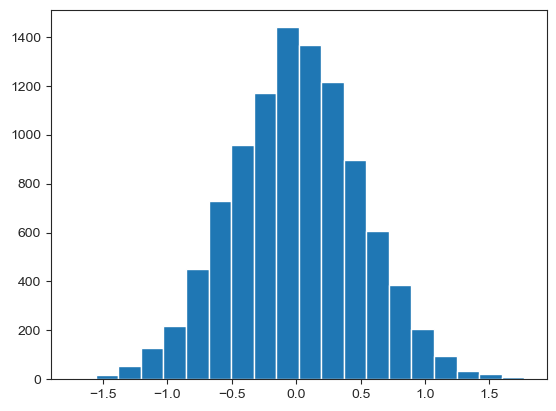

In [272]:
# Set seed
np.random.seed(321)

# Normal distribution with mean 0 and stdev 0.5
plt.hist( np.random.normal(0, 0.5, 10000), bins=20 )

# Hides the "junk"
# Tip: try running this cell without plt.show() and see what happens
plt.show()

Alright, let's get back to our simulation. Earlier, I created an input feature x
 with 100 values. So now we're going to generate 100 random noise values ϵ
.
As a reminder, this is the noisy sine function I am simulating:

y=sin(x)+ϵ

In [276]:
# Set seed
np.random.seed(321)

# Generate 100 noise values
noise = np.random.normal (0, .5, 100)

In [280]:
noise #quick sanity check

array([ 0.08625973,  0.81774127,  0.0186682 , -0.44207484, -0.57159613,
       -0.31068302, -0.67432479, -0.40986552, -0.06712695,  0.79980002,
       -0.14180182, -0.25316991,  0.03445421,  0.72612975, -0.8195478 ,
       -0.15632972, -0.43563321, -0.2283412 , -0.06123336, -0.22553115,
       -0.54614187, -0.68108984, -0.08299348,  0.32269454,  0.40753676,
       -0.00927985,  0.21669034,  0.18741828, -0.44453049,  0.20613713,
       -0.51516193, -0.17060071, -1.02189334, -0.36881906,  0.67915022,
       -0.1509497 , -0.21600303, -0.06925208,  0.1820909 ,  0.51573582,
        0.38830749, -0.06381335,  0.0489446 , -0.78316542, -0.18106105,
        0.10643544,  0.13296732, -0.6986669 ,  0.09974288, -0.11546677,
        0.0684177 ,  0.92417184,  0.53222512, -0.76870538,  0.03723013,
        0.64591855,  0.48331957,  0.21097509,  0.89789212, -0.08977569,
        0.49122128,  0.36819017, -0.43599734,  0.16139671, -1.14485101,
        0.64706494,  0.20832068,  0.26015074,  0.25499325, -0.18

## IV. Putting It All Together: Noisy Sine Wave

So far, I've seen...

How to generate an evenly spaced array of input features x

How to calculate sin(x)
 with NumPy functions...
And how to randomly generate a corresponding array of noise values ϵ

Now all that's left is to put it all together to create our target variable y=sin(x)+ϵ

In [283]:
# input feature
x = np.linspace(0, 2*np.pi, 100)

# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 100)

# target variable
y = np.sin(x) + noise

Ok, just to recap, let's break down that code.

Input feature x
: First, we created an evenly spaced array of 100 numbers from 0 to 2π

x = np.linspace(0, 2*np.pi, 100)

Random noise ϵ: Next, we generated 100 random numbers from a normal distribution centered at 0.

np.random.seed(321)
noise = np.random.normal(0, .5, 100)

Noisy sine wave: Finally, we generated 100 values for the target variable, y, based on the sin(x) function plus the random noise.

y = np.sin(x) + noise

Next, for convenience, let's throw x and y into a Pandas DataFrame.
We'll be saving this dataframe as a CSV file and importing it in the next module.

In [287]:
# Create DataFrame with x and y
df = pd.DataFrame({'x' : x, 'y': y})
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


In [289]:
df.to_csv('simulated_data.csv', index=False)

Finally, before moving on, let's plot that dataset first.
First, we'll use plt.scatter() to plot a scatterplot of the simulated dataset x and y=sin(x)+ϵ

Then, we'll use plt.plot(), which we already introduced earlier, to plot the "true underlying mapping function" y=sin(x) (without the noise).

Tip: color='k' sets the line's color to black.

Since we saved x and y in DataFrame df, we can access them with df.x and df.y.

By calling both functions in sequence, we can overlay both plots, like so:

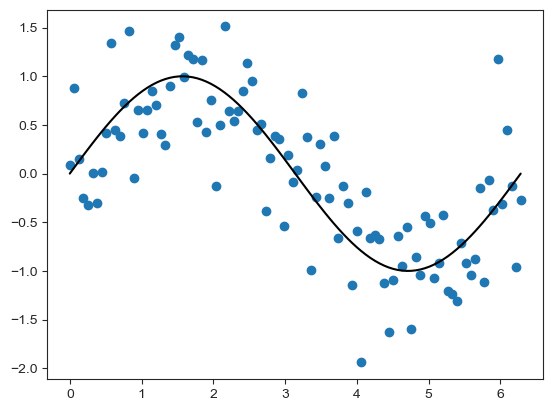

In [293]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, np.sin(df.x), color= 'k')

plt.show()

The smooth black line is the sine wave, which represents the "true underlying relationship" between x and y
before adding random noise. 
 
The blue dots are the 100 simulated data points obtained by first creating a sequence of 100 values of x
and then adding randomly generated noise ϵ to form the noisy sine wave y=sin(x)+ϵ



## <span style="color:RoyalBlue">2nd Simulation</span>



In [300]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

In [302]:
df = pd.read_csv('simulated_data.csv')
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


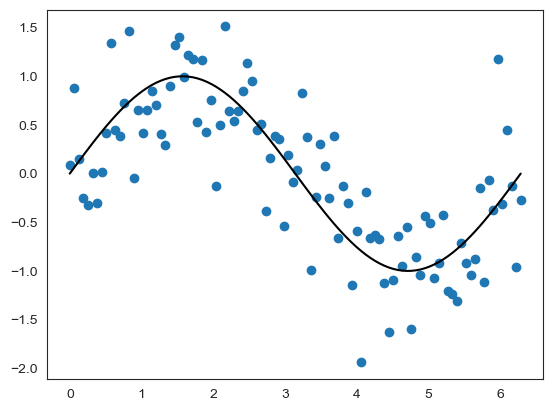

In [304]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, np.sin(df.x), color='k')

plt.show()

## <span style="color:RoyalBlue"> Noisy Tangent</span>

#### Generated an <code>x</code> and <code>y</code> that has the following noisy mapping function.

> $y = tan(x) + \epsilon$


In [310]:
# input feature
x = np.linspace(0, 2*np.pi, 100)

# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 100)

# target variable
y = np.tan(x) + noise

In [314]:
print( y[:5] )

[ 0.08625973  0.88129314  0.14628738 -0.24934064 -0.31213198]


#### Plotted a scatterplot of $x$ versus $y$, along with an overlay of the tangent function.
* Tip: For a more useful plot, I set the y-axis limits to be between -5 and 5. You can use the <code>plt.ylim(-5, 5)</code> command directly after the <code>plt.plot()</code> command.

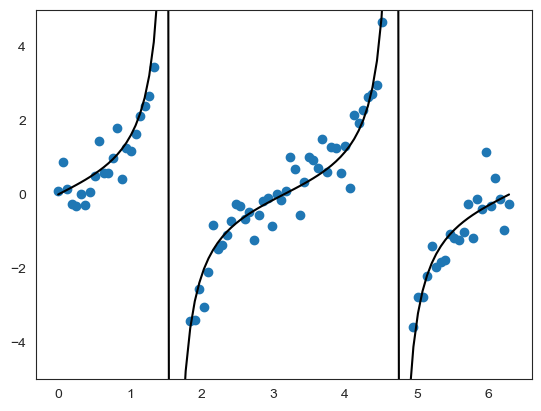

In [317]:
# Scatterplot of x and y
plt.scatter(x, y)

# Overlay the tangent function
plt.plot(x, np.tan(x), color='k')
plt.ylim(-5, 5)

plt.show()

#### Then I stored the generated dataset in DataFrame called <code>tangent_df</code> and saved it to a CSV named <code>simulated_tangent_data.csv</code>. Display the first 5 rows as a sanity check.


In [321]:
# Create DataFrame with x and y
tangent_df = pd.DataFrame({'x' : x, 'y': y})

# Save to CSV
tangent_df.to_csv('simulated_tangent_data.csv', index=False)

# Sanity check: first 5 rows
tangent_df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881293
2,0.126933,0.146287
3,0.190400,-0.249341
4,0.253866,-0.312132


## <span style="color:RoyalBlue"> Normal, Normal-er, Normal-est</span>

A lot of people talk about "big data," but have you ever wondered exactly why "big" data is useful? What exactly makes having a large amount of data more useful? Well, one of the main reasons "big" data is useful because in many cases it makes it much easier to tease out the "true underlying relationship."

It's related to concept from probability theory called the **law of large numbers**, which states that ***the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.***

For example, while a casino may lose money on a single roulette wheel spin, its earnings will approach a predictable "expected value" over a large number of spins (i.e. "trials"). In the end, the house always comes out on top. Another great example is how insurance companies stay so profitable. Yes, they might give big payouts to one-off claims or during freak disasters. However, over a large number of customers (i.e. "trials"), they are still earning more from the premiums paid on average.

Thus, this "expected value" (or, in the context of machine learning: the "true underlying relationship") becomes more apparent as you collect more data (i.e. "trials"). Let's see this in action! We will use the <code>np.random.normal()</code> function to illustrate this.

#### First, I plot a histogram of only 10 randomly generated samples from a normal distribution centered at 0 with a standard deviation of 1.
* Tip: We used the random seed value of 321 and <code>bins=20</code>.
* The plot does not look anything like a normal bell curve...

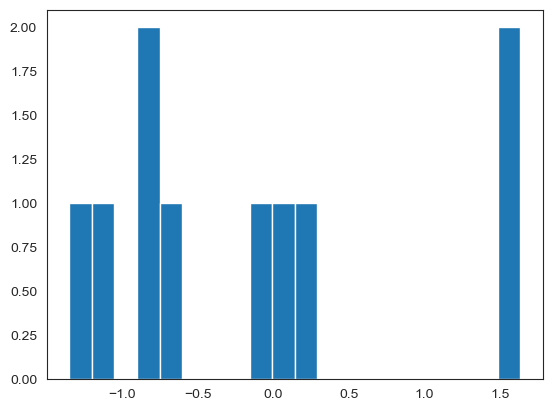

In [326]:
# Set random seed
np.random.seed(321)

# Generate sample and plot
plt.hist(np.random.normal(0, 1, 10), bins=20)
plt.show()

#### Next, I'll plot a histogram of 100 randomly generated samples from a normal distribution centered at 0 with a standard deviation of 1.
* I used the random seed value of 321 and <code>bins=20</code>.
* The plot looks a little closer to a normal bell curve.

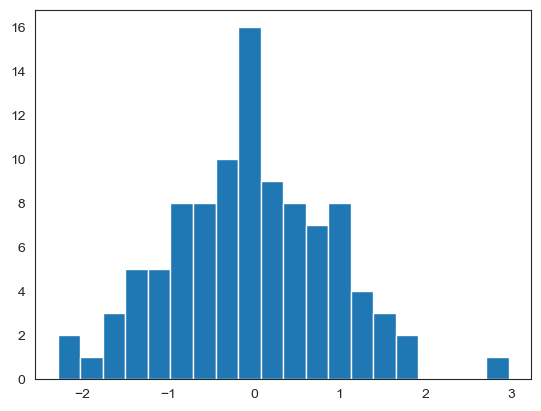

In [329]:
# Set random seed
np.random.seed(321)

# Generate sample and plot
plt.hist(np.random.normal(0, 1, 100), bins=20)
plt.show()

#### Next, I'll plot a histogram of 1,000 randomly generated samples from a normal distribution centered at 0 with a standard deviation of 1.
* I used the random seed value of 321 and <code>bins=20</code>.
* The plot looks much closer to a normal bell curve.

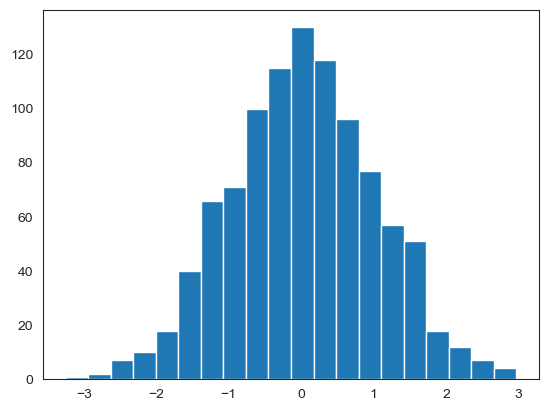

In [332]:
# Set random seed
np.random.seed(321)

# Generate sample and plot
plt.hist(np.random.normal(0, 1, 1000),
         bins=20)

plt.show()

#### Alright, let's really go all out. I plot a histogram of 100,000 randomly generated samples from a normal distribution centered at 0 with a standard deviation of 1.
* I used the random seed value of 321 and <code>bins=20</code>.
* The plot looks more like a normal bell curve.

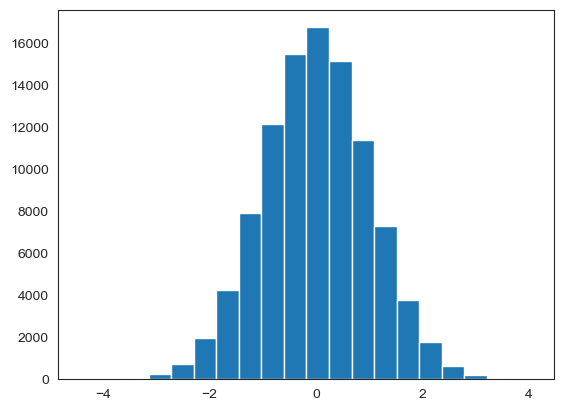

In [336]:
# Set random seed
np.random.seed(321)

# Generate sample and plot
plt.hist(np.random.normal(0, 1, 100000), bins=20)
plt.show()

#### What happened to the shape of the distribution of your sampled values as you increased the sample size? How do you think this relates to the idea of signal vs. noise?

As I increased the sample size, the shape of the distribution approached a clearer "bell curve" shape, which is the true underlying shape of a normal distribution. Because the samples were randomly generated, there will always be a certain level of "noise." However, this noise is more apparent when the sample size is lower. For example, when I had a sample size of only 10, the resulting distribution didn't resemble a bell curve at all. It could just as likely have been from a uniform distribution instead of normal distribution.

But as we increased the sample size, the signal began to outweigh the noise, leading to a much more apparent bell curve (i.e. the "true underlying distribution"). Do note that increasing dataset/sample size is only ONE way of improving signal to noise ratio. Other methods include proper data preprocessing and choosing algorithms that are more robust to noise. 

## <span style="color:RoyalBlue">Narrow, Normal, Wide</span>

$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$

The formula is for the "probability density" of the normal distribution. For example, $\mu$ is the mean, or where the distribution is centered, and $\sigma$ is the standard deviation, or a measurement of the "spread" / variance of the values.

#### I plot a histogram of 100,000 randomly generated samples from a normal distribution centered at 0 with a standard deviation of 0.5.
* I still used the random seed value of 321, but for this exercise, we recommend using <code>bins=40</code>.
* I set the x-axis limits to be consistent and going from -5 to 5. You can do so with the <code>plt.xlim(-5, 5)</code> command immediately after the <code>plt.hist()</code> command.

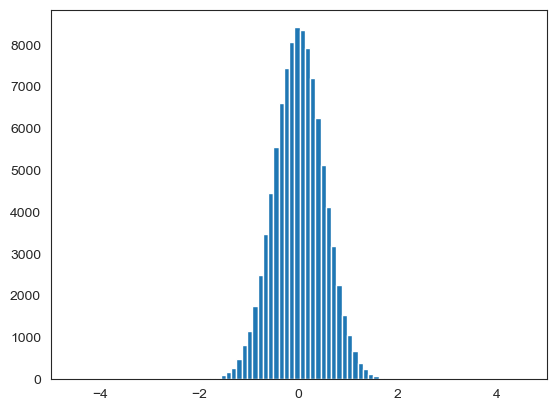

In [347]:
# Set random seed
np.random.seed(321)

# Generate sample and plot
plt.hist(np.random.normal(0, 0.5, 100000), bins=40)

# Set consistent x-axis limits
plt.xlim(-5, 5)

plt.show()

#### Now, let's see what happens when I increase the standard deviation. I plotted a histogram of 100,000 randomly generated samples from a normal distribution centered at 0 with a standard deviation of 1.
* This is why it's important to set the x-axis limits to be consistent. With consistent x-axis limits, you can compare the "fatness" of the bell curve!
* Do you notice the difference?

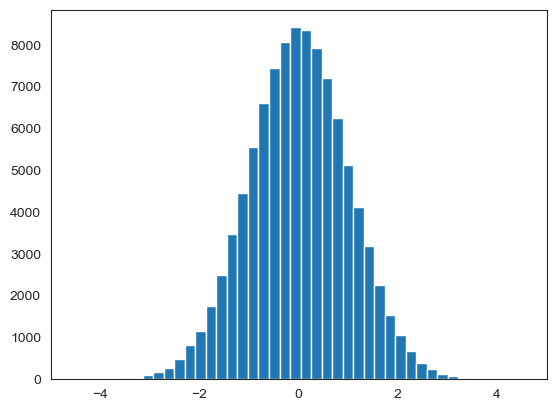

In [350]:
# Set random seed
np.random.seed(321)

# Generate sample and plot
plt.hist(np.random.normal(0, 1, 100000), bins=40)

# Set consistent x-axis limits
plt.xlim(-5, 5)

plt.show()

#### Alright, let's increase standard deviation even more. I plotted a histogram of 100,000 randomly generated samples from a normal distribution centered at 0 with a standard deviation of 2.
* All I had to do was change one value in one line of code from the previous part. But that one small change was enough to show you intuitively what happens when you increase standard deviation.

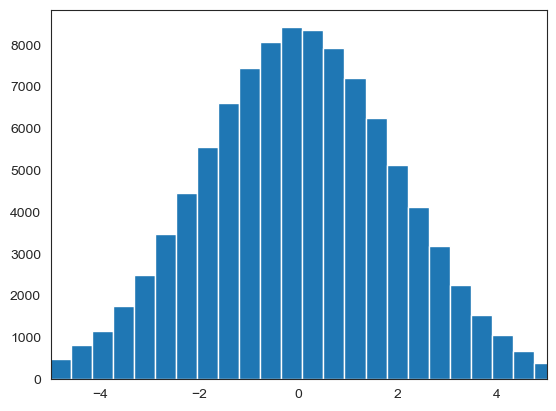

In [355]:
# Set random seed
np.random.seed(321)

# Generate sample and plot
plt.hist(np.random.normal(0, 2, 100000), bins=40)

# Set consistent x-axis limits
plt.xlim(-5, 5)

plt.show()

Now, can you the imagine the implications for everything else I've been working on? For example, remember from the Coding Section how I generated random noise $\epsilon$ using <code>np.random.normal(0, 0.5, 100)</code>? What if I actually wanted to simulate a problem where we have even NOISIER data?

Well, now that I've *seen* how the second argument, standard deviation, affects the shape of the distribution, I know that making the $\epsilon$ represent even more noise is just a matter of increasing standard deviation to <code>np.random.normal(0, 1, 100)</code> or even to <code>np.random.normal(0, 2, 100)</code>.


#### I plot a histogram of 100,000 randomly generated samples from a normal distribution centered at 2.4 with a standard deviation of 0.7.

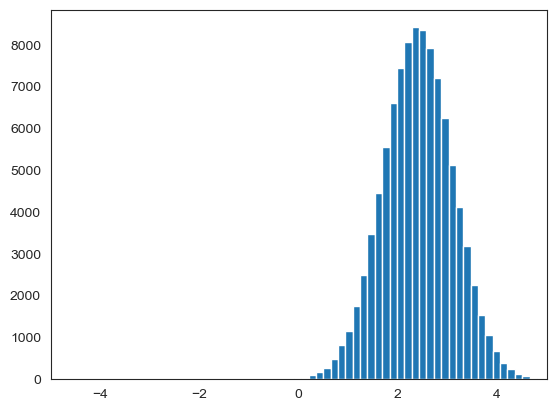

In [358]:
# Set random seed
np.random.seed(321)

# Generate sample and plot
plt.hist(np.random.normal(2.4, 0.7, 100000), bins=40)

# Set consistent x-axis limits
plt.xlim(-5, 5)

plt.show()

## <span style="color:RoyalBlue">Sports Betting</span>

Another reason simulations are so powerful is that they can make tough problems very easy or even trivial.

For example, let's say there's an upcoming basketball matchup between the defending champion (the "favorite") and your hometown team (the "underdog"). Everybody is writing off your team, but you think they have a chance to win. You want to place a bet on them winning the game, but you also don't want to be blinded by your own bias. So you want to calculate a rough probability of the underdog beating the favorite. How would you do so?

#### Well, one simple approach is to look at the average points score per game this season by both the favorite and the underdog.

You look that data up, and you discover...
* The favorite has scored an average of **92 points per game.**
* The underdog has scored an average of **80 points per game.**

Hmm... $92 > 80$, so all hope is lost right? Well, not quite. Because you then have to factor in standard deviation, or the "spread" of those points scored.

#### After all, the favorite could definitely underperform on game day while the underdogs overperform. What's the likelihood of that happening?

OK, you then look up the data on standard deviation and discover that...
* The favorite has a standard deviation of **6 points** in their scores.
* The underdog is less consistent, with a standard deviation of **8 points** in their scores.

#### Aha! Now we're getting somewhere. But what's next?

Well, if you've already learned about and remember the formulas from probability theory, you can definitely calculate the probability that the underdog scores more than the favorite based on the information above, assuming the scores are independent of one another (which is probably not correct, but for simplicity's sake, let's go with it)...

#### But what if you want to start considering more and more complex factors?

For example, maybe you want to round the scores to the nearest integer because scores cannot be partial. And in the event of a tie? Well, the game goes to overtime, but maybe you know the favorite wins almost every game that goes to overtime, so you want to automatically give ties to the favorite.

Or, at the end of the day, what if you just forgot / never learned the formulas from probability theory? The point is, it can sometimes be difficult or nearly impossible to calculate everything with straight math. 

#### Simulations to the rescue!

Let's use simulations to calculate the probability of the underdog upsetting the favorite using a simulation and using the simple approach of comparing average points scored per game and standard deviations. However, let's round the scores to the nearest integer because scores cannot be partial. And in the event of a tie, let's automatically give the game to the favorite.

#### A.) First, let's simulate the scores from only 10 games (i.e. "trials") played between the favorite and the underdog. A few details:
* Set the random seed to 321.
* Round the scores to the nearest integer.look into <code>np.round()</code>.
* Display the simulated scores from each team in those 10 games.

In [362]:
# Set random seed
np.random.seed(321)

# Simulate games of favorite vs. underdog
favorite = np.round(np.random.normal(92, 6, 10), 0)
underdog = np.round(np.random.normal(80, 8, 10), 0)

# Display scores
print('Favorite:', favorite)
print('Underdog:', underdog)

Favorite: [ 93. 102.  92.  87.  85.  88.  84.  87.  91. 102.]
Underdog: [78. 76. 81. 92. 67. 77. 73. 76. 79. 76.]


#### Created an array of those games that the underdog wins.
* I treated values in each array with the same index as the scores from each respective team in the same simulated game. So <code>favorite[0]</code> and <code>underdog[0]</code> are the scores from the favorite and the underdog respectively in the first simulated game.
* Underdog's score must be **greater than** the favorite's score (if the scores are equal, then the favorite wins in overtime).

In [368]:
print( underdog > favorite )

[False False False  True False False False False False False]


#### I calculated the percent of games that the underdog won in the 10 simulated games.
* Tip: <code>np.mean([True, False, False, False])</code> is 0.25.

In [371]:
np.mean( underdog > favorite )

0.1

#### OK, now that I've done a mini-simulation and sanity checked each step, let's actually repeat this simulation over 100,000 games instead of just 10 games. Calculate the percent of games the underdog wins.
* Let's keep random seed of 321.

In [374]:
# Set random seed
np.random.seed(321)

# Simulate games of favorite vs. underdog
favorite = np.round( np.random.normal(92, 6, 100000), 0)
underdog = np.round( np.random.normal(80, 8, 100000), 0)

# Percent of games the underdog wins
np.mean( underdog > favorite )

0.10508


Pretty cool, right? Hopefully this exercise showed you how easy it can be use to simulations to solve problems as long as you know how to define the problem!